# Técnica de Redes Neuronales para predecir un derrame cerebral

## Importar librerías

In [1]:
import pandas as pd
import sklearn
import warnings

## 1. Lectura del archivo 'stroke.csv'

In [2]:
#----------------------------------------------------------
# Data URL
#----------------------------------------------------------
url = ("https://raw.githubusercontent.com/jorgeasmz/IA-Report/main/stroke.csv")

data = pd.read_csv(url, sep=",")

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
695,Female,29.0,0,0,Yes,Private,Rural,91.45,24.2,never smoked,0
696,Female,12.0,0,0,No,children,Rural,90.58,19.2,Unknown,0
697,Female,37.0,0,0,Yes,Private,Urban,91.45,25.8,Unknown,0
698,Female,30.0,0,0,Yes,Private,Rural,89.63,23.2,smokes,0


In [3]:
#----------------------------------------------------------
# Data information
#----------------------------------------------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             700 non-null    object 
 1   age                700 non-null    float64
 2   hypertension       700 non-null    int64  
 3   heart_disease      700 non-null    int64  
 4   ever_married       700 non-null    object 
 5   work_type          700 non-null    object 
 6   Residence_type     700 non-null    object 
 7   avg_glucose_level  700 non-null    float64
 8   bmi                651 non-null    float64
 9   smoking_status     700 non-null    object 
 10  stroke             700 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 60.3+ KB


In [4]:
#----------------------------------------------------------
# Categoric variables of type 'object'
#----------------------------------------------------------
data.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,700,700,700,700,700
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,414,522,410,356,265


In [5]:
#----------------------------------------------------------
# Quantitative variables of type 'int'
#----------------------------------------------------------
data.select_dtypes(include=['int64']).describe()

,hypertension,heart_disease,stroke
count,700.000000,700.000000,700.000000
mean,0.151429,0.095714,0.355714
std,0.358722,0.294409,0.479072
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [6]:
#----------------------------------------------------------
# Quantitative variables of type 'float'
#----------------------------------------------------------
data.select_dtypes(include=['float64']).describe()

,age,avg_glucose_level,bmi
count,700.000000,700.000000,651.000000
mean,51.485200,116.647786,29.857143
std,22.401775,53.171734,8.008309
min,0.320000,55.250000,12.000000
25%,36.000000,78.787500,24.450000
50%,55.000000,96.925000,28.500000
75%,71.000000,137.795000,34.300000
max,82.000000,271.740000,71.900000


## 2. Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas

In [7]:
from sklearn.model_selection import train_test_split 

N = len(data) # Number of data available
cTrain = int(N * 0.8) # 80% for training 
cTest = N - cTrain # 20% for testing
print(N, cTrain, cTest) # Number of data, Training data, Testing data

train_data, test_data = train_test_split(data, train_size=cTrain, test_size=cTest)

700 560 140


In [8]:
#----------------------------------------------------------
# Training data dimensions
#----------------------------------------------------------
train_data.shape

(560, 11)

In [9]:
#----------------------------------------------------------
# First 5 rows of the training data set
#----------------------------------------------------------
train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
237,Male,77.0,0,0,Yes,Self-employed,Rural,162.14,32.6,formerly smoked,1
684,Female,1.8,0,0,No,children,Urban,130.61,14.4,Unknown,0
672,Female,17.0,0,0,No,Private,Urban,67.81,55.7,never smoked,0
53,Female,77.0,1,0,Yes,Self-employed,Urban,124.13,31.4,never smoked,1
183,Female,77.0,0,0,No,Private,Urban,81.32,NaN,Unknown,1


In [10]:
#-----------------------------------------------------------------
# Description of the quantitative variables for the training data
#----------------------------------------------------------------
train_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,560.000000,560.000000,560.000000,560.000000,519.000000,560.000000
mean,52.336857,0.151786,0.098214,116.936893,30.162813,0.358929
std,21.936934,0.359134,0.297870,53.139066,8.120489,0.480115
min,0.320000,0.000000,0.000000,55.250000,13.800000,0.000000
25%,37.750000,0.000000,0.000000,79.162500,24.950000,0.000000
50%,56.000000,0.000000,0.000000,97.035000,28.800000,0.000000
75%,71.000000,0.000000,0.000000,138.085000,34.500000,1.000000
max,82.000000,1.000000,1.000000,271.740000,71.900000,1.000000


## 3. Utilizar una estrategia para normalizar los datos y llenar los datos faltantes

### Pipeline para atributos categóricos

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 5 categoric variables
cat_attribs = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

### Pipeline para atributos cuantitativos

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 5 numeric variables
num_attribs = ['hypertension', 'heart_disease', 'age', 'avg_glucose_level', 'bmi']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    ])

### Pipeline completo

In [13]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs), 
])

### Conjunto de entrenamiento

In [14]:
#----------------------------------------------------------
# Training data transformation
# Independent variables
#----------------------------------------------------------
X_train = full_pipeline.fit_transform(train_data)

In [15]:
#----------------------------------------------------------
# Neurons for numeric variables: 5 -> 'hypertension', 
#                                     'heart_disease',
#                                     'age',
#                                     'avg_glucose_level',
#                                     'bmi'
#
# Neurons for categoric variables: 15 -> 'gender': 2 -> 'Male',
#                                                       'Female'
#                                        'ever_married': 2 -> 'No',
#                                                             'Yes'
#                                        'work_type': 5 -> 'children',
#                                                          'Govt_job',
#                                                          'Never_worked',
#                                                          'Private',
#                                                          'Self-employed'
#                                        'Residence_type': 2 -> 'Rural',
#                                                               'Urban'
#                                        'smoking_status': 4 -> 'formerly smoked',
#                                                               'never smoked',
#                                                               'smokes',
#                                                               'Unknown'
#----------------------------------------------------------
X_train.shape

(560, 20)

In [16]:
#----------------------------------------------------------
# First row of the transformed train data
#----------------------------------------------------------
X_train[0, :]

array([-0.42302171, -0.3300165 ,  1.12527999,  0.85141732,  0.32449883,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [17]:
#----------------------------------------------------------
# Dependent variable: 'stroke' -> 0, 1
#----------------------------------------------------------
y_train = train_data['stroke']
y_train

237    1
684    0
672    0
53     1
183    1
      ..
228    1
148    1
164    1
512    0
73     1
Name: stroke, Length: 560, dtype: int64

### Conjunto de prueba

In [18]:
#----------------------------------------------------------
# Testing data transformation
# Independent variables
#----------------------------------------------------------
X_test = full_pipeline.fit_transform(test_data)

In [19]:
X_test.shape

(140, 20)

In [20]:
X_test

array([[ 2.38047614, -0.30618622,  0.37379958, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.38047614, -0.30618622,  1.29557918, ...,  0.        ,
         1.        ,  0.        ],
       [-0.42008403, -0.30618622, -0.21278743, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.42008403, -0.30618622,  1.08608382, ...,  1.        ,
         0.        ,  0.        ],
       [-0.42008403, -0.30618622, -0.29658558, ...,  0.        ,
         0.        ,  1.        ],
       [-0.42008403, -0.30618622, -0.88317259, ...,  1.        ,
         0.        ,  0.        ]])

In [21]:
#----------------------------------------------------------
# First row of the transformed test data
#----------------------------------------------------------
X_test[0, :]

array([ 2.38047614, -0.30618622,  0.37379958, -0.68631836, -0.12476914,
        0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [22]:
#----------------------------------------------------------
# Dependent variable: 'stroke' -> 0, 1
#----------------------------------------------------------
y_test = test_data['stroke']
y_test

98     1
4      1
472    0
147    1
649    0
      ..
42     1
267    0
36     1
514    0
324    0
Name: stroke, Length: 140, dtype: int64

## 4. Construir 5 redes neuronales variando en la topología de la red la cantidad de capas ocultas y de neuronas por cada capa oculta. Puede también variar los hiperparámetros solver y la función de activación. En todas las pruebas debe usar un random_state=123. Incluya en el notebook una tabla a manera de resumen con el accuracy obtenido en cada caso y también las matrices de confusión

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#----------------------------------------------------------
# List for the models
#----------------------------------------------------------
results = []

#----------------------------------------------------------
# List of topologies
#----------------------------------------------------------
topologies = [
    (5,), # 1 hidden layer, 5 neurons per layer
    (5, 5), # 2 hidden layers, 5 neurons per layer
    (10,), # 1 hidden layer, 10 neurons per layer
    (10, 10), # 2 hidden layers, 10 neurons per layer
    (15,) # 1 hidden layer, 15 neurons per layer
    ]

#----------------------------------------------------------
# List of activation functions
#----------------------------------------------------------
activation_functions = ["identity", "logistic", "tanh", "relu"] 

#----------------------------------------------------------
# List of solvers
#----------------------------------------------------------
solvers = ["lbfgs", "adam", "sgd"]

for topology in topologies:
    for activation in activation_functions:
        for solver in solvers:
            # Create the neural network model
            model = MLPClassifier(hidden_layer_sizes=topology, activation=activation, solver=solver, random_state=123)
            # Train the model
            model.fit(X_train, y_train)
            # Test the model
            y_pred = model.predict(X_test)
            # Calculate the accuracy of the model
            accuracy = round(accuracy_score(y_test, y_pred), 4)
            # Calculate the confusion matrix of the model
            confusion_m = confusion_matrix(y_test, y_pred)
            # Save the result
            results.append({"Topology": topology, 
                            "Activation function": activation, 
                            "Solver": solver, 
                            "Accuracy": accuracy, 
                            "Confusion matrix": confusion_m})

/home/jorge/Aplicaciones/Anaconda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/Aplicaciones/Anaconda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/Aplicaciones/Anaconda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jorge/Aplicaciones/Anaconda/lib/python3.9/site-packages/sklea

In [95]:
import pandas as pd

#----------------------------------------------------------
# Table of results
#----------------------------------------------------------
table = pd.DataFrame(results)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(table)

    Topology Activation function Solver  Accuracy      Confusion matrix
0       (5,)            identity  lbfgs     0.821  [[79, 13], [12, 36]]
1       (5,)            identity   adam     0.829  [[81, 11], [13, 35]]
2       (5,)            identity    sgd     0.807  [[81, 11], [16, 32]]
3       (5,)            logistic  lbfgs     0.707  [[69, 23], [18, 30]]
4       (5,)            logistic   adam     0.779   [[86, 6], [25, 23]]
5       (5,)            logistic    sgd     0.657    [[92, 0], [48, 0]]
6       (5,)                tanh  lbfgs     0.779  [[74, 18], [13, 35]]
7       (5,)                tanh   adam     0.821  [[81, 11], [14, 34]]
8       (5,)                tanh    sgd     0.793  [[82, 10], [19, 29]]
9       (5,)                relu  lbfgs     0.764  [[75, 17], [16, 32]]
10      (5,)                relu   adam     0.850   [[83, 9], [12, 36]]
11      (5,)                relu    sgd     0.736   [[89, 3], [34, 14]]
12    (5, 5)            identity  lbfgs     0.821  [[79, 13], [1

## 5. Indique en el notebook usando una celda de tipo Markdown los hiperparámetros que por el momento le permiten obtener la red con mayor *accuracy*

In [111]:
#----------------------------------------------------------
# Model with the maximun accuracy
#----------------------------------------------------------
max_accuracy_model = max(results, key=lambda x: x["Accuracy"])

print("*", max_accuracy_model["Topology"])
print("*", max_accuracy_model["Activation function"])
print("*", max_accuracy_model["Solver"])
print("*", max_accuracy_model["Accuracy"])

* (15,)
* identity
* sgd
* 0.8643


Los hiperparámetros que mejor *accuracy* otorgan son:

**Topología:** (15) <br>
**Función de activación:** identity <br>
**Solver:** sgd <br>
**Accuracy:** 0,8643 <br>

### Matriz de confusión

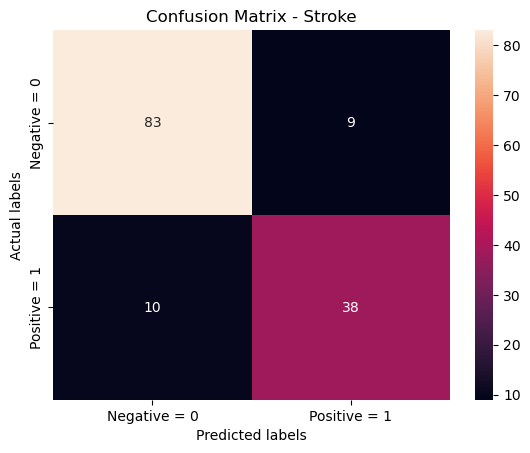

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(max_accuracy_model["Confusion matrix"], annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Stroke') 
ax.xaxis.set_ticklabels(['Negative = 0', 'Positive = 1'])
ax.yaxis.set_ticklabels(['Negative = 0', 'Positive = 1']);
plt.show();

## 6. Seleccione uno de los hiperparámetros disponibles en la documentación que sea diferente al solver, a la función de activación, y al random_state. Realice dos variaciones en el hiperparámetro seleccionado manteniendo los otros hiperparámetros del punto anterior. Indique el accuracy obtenido al modificar el hiperparámetro seleccionado y analice si la red mejora, empeora, o mantiene su exactitud. Incluya en el notebook dicho análisis

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#----------------------------------------------------------
# List for the new results
#----------------------------------------------------------
new_results = []

#----------------------------------------------------------
# List of maximum initial learning rates
#----------------------------------------------------------
learning_rate_inits = [0.005, 0.0005]

for learning_rate_init in learning_rate_inits:
    # Create the neural network model
    model = MLPClassifier(hidden_layer_sizes=(15,), activation="identity", solver="sgd", random_state=123, learning_rate_init=learning_rate_init)
    # Train the model
    model.fit(X_train, y_train) 
    # Test the model
    y_pred = model.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    # Save the result
    new_results.append({"Initial learning rate": learning_rate_init, 
                        "Accuracy": accuracy})

/home/jorge/Aplicaciones/Anaconda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
import pandas as pd

#----------------------------------------------------------
# Modified neural network results
#----------------------------------------------------------
new_table = pd.DataFrame(new_results)
display(new_table)

,Initial learning rate,Accuracy
0,0.0050,0.842857
1,0.0005,0.828571


In [107]:
#----------------------------------------------------------
# Original neural network accuracy
#----------------------------------------------------------
print("Accuracy de la red neuronal del punto 5:", max_accuracy_model["Accuracy"])

#----------------------------------------------------------
# Modified neural network accuracy
#----------------------------------------------------------
max_accuracy_n = max(new_results, key=lambda x: x["Accuracy"])

print("Accuracy de la red neuronal del punto 6:", max_accuracy_n["Accuracy"])

Accuracy de la red neuronal del punto 5: 0.8643
Accuracy de la red neuronal del punto 6: 0.8428571428571429


### Análisis

Con base en el hecho de que la red neuronal modificada en el punto 6, presentó una reducción en el *accuracy*, se puede concluir que la red empeoró al modificar el parámetro 'learning_rate_init'.

Por lo tanto, la red neuronal que mejores resultados genera, tiene los siguientes hiperparámetros:

**Topología:** (15) <br>
**Función de activación:** identity <br>
**Solver:** sgd <br>
**Accuracy:** 0,8643 <br>
**Tasa de aprendizaje inicial**: *default* = 0.001 <br>
**Matriz de confusión:** [[83 9], [10, 38]]